In [2]:
import pandas as pd
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
#Load Institutions data
Institutions = pd.read_csv('2012_to_2014_institutions_data.csv', dtype=str)
Institutions['Assets_000_Panel'] = pd.to_numeric(Institutions['Assets_000_Panel'])

#Load Loans Data
Loans = pd.read_csv('2012_to_2014_loans_data.csv', dtype = str)
for column in ['Loan_Amount_000','Applicant_Income_000','Conforming_Limit_000','FFIEC_Median_Family_Income']:
    Loans[column] = pd.to_numeric(Loans[column], errors='coerce')

In [3]:
Institutions.head()

,As_of_Year,Respondent_ID,Agency_Code,Respondent_Name_TS,Respondent_City_TS,Respondent_State_TS,Respondent_ZIP_Code,Parent_Name_TS,Parent_City_TS,Parent_State_TS,Parent_ZIP_Code,Assets_000_Panel
0,2012,0000000047,1,FIRST FINANCIAL BANK NA,TERRE HAUTE,IN,47802,FIRST FINANCIAL CORPORATION,TERRE HAUTE,IN,47807,2854392
1,2012,0000000056,1,"FIRST FINANCIAL BANK, N.A.",CINCINNATI,OH,45202,NaN,NaN,NaN,NaN,6663427
2,2012,0000000086,1,FIRST NATIONAL BANK OF GERMANT,GERMANTOWN,OH,45327-1349,NaN,NaN,NaN,NaN,52094
3,2012,0000000182,1,EXCHANGE NATIONAL BANK & TRUST,ATCHISON,KS,66002,NaN,NaN,NaN,NaN,330487
4,2012,0000000324,1,FIRST NATIONAL BANK AND TRUST,NEWTOWN,PA,18940,NaN,NaN,NaN,NaN,785017


In [4]:
Institutions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21655 entries, 0 to 21654
Data columns (total 12 columns):
As_of_Year             21655 non-null object
Respondent_ID          21655 non-null object
Agency_Code            21655 non-null object
Respondent_Name_TS     21655 non-null object
Respondent_City_TS     21655 non-null object
Respondent_State_TS    21655 non-null object
Respondent_ZIP_Code    21655 non-null object
Parent_Name_TS         5458 non-null object
Parent_City_TS         5455 non-null object
Parent_State_TS        5486 non-null object
Parent_ZIP_Code        5477 non-null object
Assets_000_Panel       21655 non-null int64
dtypes: int64(1), object(11)
memory usage: 2.0+ MB


In [5]:
Loans.head()

,Agency_Code,Applicant_Income_000,As_of_Year,Census_Tract_Number,County_Code,FFIEC_Median_Family_Income,Loan_Amount_000,MSA_MD,Number_of_Owner_Occupied_Units,Respondent_ID,...,Loan_Purpose_Description,Agency_Code_Description,Lien_Status_Description,Loan_Type_Description,State,County_Name,Conforming_Limit_000,Conventional_Status,Conforming_Status,Conventional_Conforming_Flag
0,3,84.0,2012,0207.00,079,54900.0,94,16620,00001545,0000000384,...,Refinance,FDIC,First Lien,Conventional,WV,PUTNAM,417.0,Conventional,Conforming,Y
1,3,84.0,2012,9556.00,043,54900.0,133,16620,00001548,0000000384,...,Refinance,FDIC,First Lien,Conventional,WV,LINCOLN,417.0,Conventional,Conforming,Y
2,3,53.0,2012,9556.00,043,54900.0,70,16620,00001548,0000000384,...,Refinance,FDIC,First Lien,Conventional,WV,LINCOLN,417.0,Conventional,Conforming,Y
3,3,85.0,2012,0206.01,079,54900.0,102,16620,00001935,0000000384,...,Refinance,FDIC,First Lien,Conventional,WV,PUTNAM,417.0,Conventional,Conforming,Y
4,3,38.0,2012,0107.01,039,54900.0,112,16620,00001492,0000000384,...,Purchase,FDIC,First Lien,Conventional,WV,KANAWHA,417.0,Conventional,Conforming,Y


In [ ]:
Loans.describe()

In [ ]:
Loans.info()

# Data Cleaning

### Quality Assessment on Respondent_Name

In [5]:
#Institutions with Respondent_Name_TS issue
#In certain instances, for a particular respondent_id, every year the respondent seems to change. I have taken the most recent respondent name
NameIssue_Institutions = Institutions.groupby(['Respondent_ID','Agency_Code']).agg({'Respondent_Name_TS' : lambda x: len(pd.unique(x))}).reset_index()
NameIssue_Institutions = NameIssue_Institutions[NameIssue_Institutions['Respondent_Name_TS']!=1]

In [ ]:
NameIssue_Institutions

In [6]:
#Let us look at an Example
Institutions[(Institutions['Respondent_ID']=='0000000395') & (Institutions['Agency_Code']=='5')]

,As_of_Year,Respondent_ID,Agency_Code,Respondent_Name_TS,Respondent_City_TS,Respondent_State_TS,Respondent_ZIP_Code,Parent_Name_TS,Parent_City_TS,Parent_State_TS,Parent_ZIP_Code,Assets_000_Panel
4410,2012,0000000395,5,DAYTON FIREFIGHTERS FCU,DAYTON,OH,45402,NaN,NaN,NaN,NaN,43068
11657,2013,0000000395,5,DAYTON FIREFIGHTERS FEDERAL CU,DATYON,OH,45402,NaN,NaN,NaN,NaN,44530
18739,2014,0000000395,5,DAYTON FIREFIGHTERS FEDERAL CR,DAYTON,OH,45402,NaN,NaN,NaN,NaN,47779


### Clean Institutions data

In [7]:
#Solution: Keep just the last record of Agency_Code, Respondent_ID
Clean_Institutions = Institutions.sort_values(by='As_of_Year')
Clean_Institutions = Clean_Institutions.drop_duplicates(subset = ['Agency_Code','Respondent_ID'], keep = 'last')

### Clean Loans data

In [18]:
CleanLoans = Loans.copy()
Loans.head()

,Agency_Code,Applicant_Income_000,As_of_Year,Census_Tract_Number,County_Code,FFIEC_Median_Family_Income,Loan_Amount_000,MSA_MD,Number_of_Owner_Occupied_Units,Respondent_ID,...,Loan_Purpose_Description,Agency_Code_Description,Lien_Status_Description,Loan_Type_Description,State,County_Name,Conforming_Limit_000,Conventional_Status,Conforming_Status,Conventional_Conforming_Flag
0,3,84.0,2012,0207.00,079,54900.0,94,16620,00001545,0000000384,...,Refinance,FDIC,First Lien,Conventional,WV,PUTNAM,417.0,Conventional,Conforming,Y
1,3,84.0,2012,9556.00,043,54900.0,133,16620,00001548,0000000384,...,Refinance,FDIC,First Lien,Conventional,WV,LINCOLN,417.0,Conventional,Conforming,Y
2,3,53.0,2012,9556.00,043,54900.0,70,16620,00001548,0000000384,...,Refinance,FDIC,First Lien,Conventional,WV,LINCOLN,417.0,Conventional,Conforming,Y
3,3,85.0,2012,0206.01,079,54900.0,102,16620,00001935,0000000384,...,Refinance,FDIC,First Lien,Conventional,WV,PUTNAM,417.0,Conventional,Conforming,Y
4,3,38.0,2012,0107.01,039,54900.0,112,16620,00001492,0000000384,...,Purchase,FDIC,First Lien,Conventional,WV,KANAWHA,417.0,Conventional,Conforming,Y


#### Applicant_Income_000


In [19]:
#Fill Applicant fields with missing income (NULL and 0) with Family Income if available
CleanLoans.loc[CleanLoans['Applicant_Income_000'].isnull(),'Applicant_Income_000'] = CleanLoans.loc[CleanLoans['Applicant_Income_000'].isnull(),'FFIEC_Median_Family_Income']/1000
CleanLoans.loc[CleanLoans['Applicant_Income_000']==0,'Applicant_Income_000'] = CleanLoans.loc[CleanLoans['Applicant_Income_000']==0,'FFIEC_Median_Family_Income']/1000

In [20]:
#Drop Rows with no Applicant Income and No Family Income 
CleanLoans = CleanLoans[CleanLoans['Applicant_Income_000'].notnull()]

In [21]:
#Develop an Income Ratio Metric: Applicant_Family_IncomeRatio i.e. Check Ratio of Applicant Income to Median Family Income
#Drop rows where this Income Ratio is greater than 99 percentile (Another way could be to use a fixed value like 5 as a ceiling for this ratio)
CleanLoans['Applicant_Family_IncomeRatio'] = CleanLoans['Applicant_Income_000'] / (CleanLoans['FFIEC_Median_Family_Income']/1000)
CleanLoans['Applicant_Family_IncomeRatio'].describe()

count    1.319481e+06
mean     1.319210e+00
std      1.287710e+00
min      8.984726e-03
25%      7.663198e-01
50%      1.018868e+00
75%      1.540616e+00
max      1.637885e+02
Name: Applicant_Family_IncomeRatio, dtype: float64

In [22]:
#Check Ratio Applicant Income, Median Family Income. 
CleanLoans['Applicant_Family_IncomeRatio'].quantile(np.arange(0,1,0.01))

0.00    0.008985
0.01    0.273843
0.02    0.331126
0.03    0.370370
0.04    0.401494
0.05    0.428752
0.06    0.453258
0.07    0.473037
0.08    0.491958
0.09    0.512821
0.10    0.529801
0.11    0.549065
0.12    0.566572
0.13    0.582011
0.14    0.596026
0.15    0.613915
0.16    0.630841
0.17    0.644258
0.18    0.661376
0.19    0.677570
0.20    0.691114
0.21    0.708181
0.22    0.720588
0.23    0.736544
0.24    0.753968
0.25    0.766320
0.26    0.782710
0.27    0.795053
0.28    0.812379
0.29    0.829439
          ...   
0.70    1.409650
0.71    1.434109
0.72    1.460280
0.73    1.482890
0.74    1.510859
0.75    1.540616
0.76    1.568895
0.77    1.600467
0.78    1.634349
0.79    1.666667
0.80    1.702933
0.81    1.743397
0.82    1.783380
0.83    1.825095
0.84    1.869688
0.85    1.918195
0.86    1.974299
0.87    2.031030
0.88    2.091255
0.89    2.159686
0.90    2.233503
0.91    2.322887
0.92    2.414734
0.93    2.526636
0.94    2.661597
0.95    2.832861
0.96    3.055818
0.97    3.3857

In [24]:
#Dropping rows where the IncomeRatio is greater than 99 percentile (Another way could be use a fixed value like 5)
CleanLoans = CleanLoans.drop(CleanLoans[CleanLoans['Applicant_Family_IncomeRatio']>CleanLoans['Applicant_Family_IncomeRatio'].quantile(0.99)].index)

In [25]:
CleanLoans.describe()

,Applicant_Income_000,FFIEC_Median_Family_Income,Loan_Amount_000,Conforming_Limit_000,Applicant_Family_IncomeRatio
count,1.294798e+06,1.293228e+06,1.294798e+06,1.294001e+06,1.293228e+06
mean,1.054342e+02,8.770455e+04,2.831403e+02,5.330116e+02,1.206243e+00
std,6.256328e+01,1.950725e+04,9.716624e+02,8.687892e+01,6.516611e-01
min,1.000000e+00,4.530000e+04,1.000000e+00,4.170000e+02,8.984726e-03
25%,6.200000e+01,7.330000e+04,1.520000e+02,4.580000e+02,7.593458e-01
50%,9.000000e+01,8.560000e+04,2.320000e+02,5.350000e+02,1.001727e+00
75%,1.320000e+02,1.059000e+05,3.410000e+02,6.250000e+02,1.495845e+00
max,1.519000e+03,1.134000e+05,9.962500e+04,6.250000e+02,3.955696e+00


In [26]:
#Check Ratio of Loan Amount and Applicant Income. New variable: Loan_Income_Ratio
CleanLoans['Loan_Income_Ratio'] = CleanLoans['Loan_Amount_000'] / CleanLoans['Applicant_Income_000']
CleanLoans['Loan_Income_Ratio'].describe()

count    1.294798e+06
mean     3.457820e+00
std      4.131678e+01
min      3.937008e-03
25%      1.845133e+00
50%      2.618182e+00
75%      3.510000e+00
max      5.997000e+03
Name: Loan_Income_Ratio, dtype: float64

In [27]:
#Check Ratio Applicant Income, Loan Amount
CleanLoans['Loan_Income_Ratio'].quantile(np.arange(0,1,0.01))

0.00    0.003937
0.01    0.343284
0.02    0.563107
0.03    0.708333
0.04    0.818926
0.05    0.909091
0.06    0.988764
0.07    1.058325
0.08    1.120879
0.09    1.180556
0.10    1.235294
0.11    1.285714
0.12    1.334586
0.13    1.383085
0.14    1.428571
0.15    1.470588
0.16    1.513043
0.17    1.553398
0.18    1.593301
0.19    1.630435
0.20    1.666667
0.21    1.704545
0.22    1.740654
0.23    1.776173
0.24    1.811321
0.25    1.845133
0.26    1.878205
0.27    1.910714
0.28    1.943182
0.29    1.975460
          ...   
0.70    3.300000
0.71    3.339130
0.72    3.380282
0.73    3.422897
0.74    3.466667
0.75    3.510000
0.76    3.555556
0.77    3.601434
0.78    3.650794
0.79    3.700000
0.80    3.750000
0.81    3.804348
0.82    3.860294
0.83    3.918699
0.84    3.978261
0.85    4.042857
0.86    4.111111
0.87    4.181818
0.88    4.259259
0.89    4.343720
0.90    4.431818
0.91    4.528302
0.92    4.633333
0.93    4.750000
0.94    4.884615
0.95    5.040000
0.96    5.227776
0.97    5.4705

In [28]:
#Drop rows where the IncomeLoanRatio is greater than 99 percentile (Another way could be use a fixed value like 6)
CleanLoans = CleanLoans.drop(CleanLoans[CleanLoans['Loan_Income_Ratio']>CleanLoans['Loan_Income_Ratio'].quantile(0.99)].index)

In [29]:
#High amount Loans request are done by high income applicants (Probably not wrong data)
CleanLoans.sort_values(by='Loan_Amount_000', ascending=False).head(100)

,Agency_Code,Applicant_Income_000,As_of_Year,Census_Tract_Number,County_Code,FFIEC_Median_Family_Income,Loan_Amount_000,MSA_MD,Number_of_Owner_Occupied_Units,Respondent_ID,...,Lien_Status_Description,Loan_Type_Description,State,County_Name,Conforming_Limit_000,Conventional_Status,Conforming_Status,Conventional_Conforming_Flag,Applicant_Family_IncomeRatio,Loan_Income_Ratio
1257320,2,408.0,2014,9301.00,061,107100.0,2315,47894,00001045,0000506922,...,First Lien,Conventional,VA,FAUQUIER,625.0,Conventional,Jumbo,N,3.809524,5.674020
621583,9,418.0,2013,0006.00,001,105900.0,2280,47894,00001384,54-0259290,...,First Lien,Conventional,DC,DISTRICT OF COL,625.0,Conventional,Jumbo,N,3.947120,5.454545
58136,9,400.0,2012,0008.02,001,105700.0,2274,47894,00000841,0000451965,...,First Lien,Conventional,DC,DISTRICT OF COL,625.0,Conventional,Jumbo,N,3.784295,5.685000
440023,9,353.0,2012,4803.00,059,105700.0,2252,47894,00002167,0000675332,...,First Lien,Conventional,VA,FAIRFAX,625.0,Conventional,Jumbo,N,3.339640,6.379603
58496,9,416.0,2012,0041.00,001,105700.0,2250,47894,00000713,0000476810,...,First Lien,Conventional,DC,DISTRICT OF COL,625.0,Conventional,Jumbo,N,3.935667,5.408654
215000,7,400.0,2012,7060.05,031,113400.0,2183,13644,00001349,7280100005,...,First Lien,Conventional,MD,MONTGOMERY,625.0,Conventional,Jumbo,N,3.527337,5.457500
609204,5,417.0,2013,0041.00,001,105900.0,2158,47894,00000713,0000005582,...,First Lien,Conventional,DC,DISTRICT OF COL,625.0,Conventional,Jumbo,N,3.937677,5.175060
73413,7,400.0,2012,0013.01,001,105700.0,2014,47894,00000570,7280100005,...,First Lien,Conventional,DC,DISTRICT OF COL,625.0,Conventional,Jumbo,N,3.784295,5.035000
395525,5,321.0,2012,4704.00,059,105700.0,2000,47894,00001488,0000005582,...,First Lien,Conventional,VA,FAIRFAX,625.0,Conventional,Jumbo,N,3.036897,6.230530
1137712,9,359.0,2014,7055.02,031,111300.0,2000,43524,00001288,0002489805,...,First Lien,Conventional,MD,MONTGOMERY,625.0,Conventional,Jumbo,N,3.225517,5.571031


## Data Quality Check Summary

##### Institutions:
**Respondent_Name** may vary from year to year so the safest option would be to keep one record as the true value. It can be either the oldest record or the newest record. For this we keep the oldest record

##### Loans
**Applicant_Income_000, FFIEC_Median_Family_Income and Loan_Amount_000** are important to get a Loan so they need to be checked for quality. 

Some rules to clean the Loans data could be:
* Fill *Applicant_Income* field null values with the *FFIEC_Median_Family_Income*. 
* Drop the records with *Applicant_Income* and *FFIEC_Median_Family_Income* fields both missing   
* Check the ratio between Applicant_Income_000 and FFIEC_Median_Family_Income. 99% of the records have a ratio lower than 5 so we can *remove all records where the ratio is greater than 5* which is a reasonable threshold
* Check the ratio between Loan_Amount_000 and Applicant_Income_000. 99% of the records have a ratio lower than 6 so we could *remove all records where the ratio is greater than 6*

## Data Munging

Merge the application data with institution data such that each loan application is assigned a Respondent_Name. 
Additionally, create a new attribute that buckets Loan_Amount_000 in reasonable groups

### Plotting distribution to bucket Loans into reasonable groups

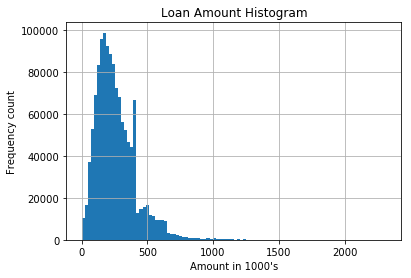

In [30]:
CleanLoans['Loan_Amount_000'].hist(bins=100)
plt.title("Loan Amount Histogram")
plt.xlabel("Amount in 1000's")
plt.ylabel("Frequency count")
fig = plt.gcf()
plt.show()

In [31]:
CleanLoans['Loan_Amount_000'].describe()

count    1.281850e+06
mean     2.607742e+02
std      1.552571e+02
min      1.000000e+00
25%      1.520000e+02
50%      2.310000e+02
75%      3.400000e+02
max      2.315000e+03
Name: Loan_Amount_000, dtype: float64

In [36]:
LoanAmounts = np.array(CleanLoans['Loan_Amount_000'])
B1 = np.percentile(LoanAmounts, 40)
B2 = np.percentile(LoanAmounts, 80)
B3 = np.percentile(LoanAmounts, 95)

#Four practical buckets could be made using the values B1, B2, B3
#1,000 to 200,000 - Small
#200,000 to 400,000 - Medium
#400,000 to 600,000 - Big
#600,000 and above - Mega

In [38]:
def hmda_init(LoansDF, InstitutionsDF):
    
    #Clean Institutions
    #Keep just last record of Agency_Code, Respondent_ID
    Clean_Institutions = InstitutionsDF.sort_values(by='As_of_Year')
    Clean_Institutions = Clean_Institutions.drop_duplicates(subset = ['Agency_Code','Respondent_ID'], keep = 'last')
    
    #Clean Loans
    Clean_Loans = LoansDF.copy()
    #Fill NULL and 0 income with Family Income
    Clean_Loans.loc[Clean_Loans['Applicant_Income_000'].isnull(),'Applicant_Income_000'] = Clean_Loans.loc[Clean_Loans['Applicant_Income_000'].isnull(),'FFIEC_Median_Family_Income']/1000
    Clean_Loans.loc[Clean_Loans['Applicant_Income_000']==0,'Applicant_Income_000'] = Clean_Loans.loc[Clean_Loans['Applicant_Income_000']==0,'FFIEC_Median_Family_Income']/1000
    
    #Calculate Applicant/Family Income Ratio
    Clean_Loans['Applicant_Family_IncomeRatio'] = Clean_Loans['Applicant_Income_000'] / (Clean_Loans['FFIEC_Median_Family_Income']/1000)
    
    #Filter Applicant/Family Income Ratio Outliers
    Clean_Loans = Clean_Loans.drop(Clean_Loans[Clean_Loans['Applicant_Family_IncomeRatio']>5].index)
    
    #Calculate Loan Income Ratio
    Clean_Loans['Loan_Income_Ratio'] = Clean_Loans['Loan_Amount_000'] / Clean_Loans['Applicant_Income_000']
    
    #Filter Applicant/Family Income Ratio Outliers
    Clean_Loans = Clean_Loans.drop(Clean_Loans[Clean_Loans['Loan_Income_Ratio']>6].index)
    
    #Merge Application with Institutions
    MergedDF = Clean_Loans.merge(Clean_Institutions[['Agency_Code','Respondent_ID','Respondent_Name_TS']], how = 'inner', on = ['Agency_Code','Respondent_ID'])
    
    #Create buckets for Loan Amount looking at the distribution of the loan amounts
    MergedDF['Loan_Size'] = pd.cut(CleanLoans['Loan_Amount_000'],[min(CleanLoans['Loan_Amount_000']),200,400,600,max(CleanLoans['Loan_Amount_000'])], labels=['Small', 'Medium', 'Big', 'Mega'])
    
    #Drop Columns used for cleaning
    MergedDF = MergedDF.drop(['Applicant_Family_IncomeRatio','Loan_Income_Ratio'],axis = 1)
    
    return(MergedDF)

In [40]:
def hmda_to_json(data, output_path, states=None, conventional_conforming=None):
    FilteredData = data.copy()
    if states:
        FilteredData = FilteredData[FilteredData['State'].isin(states)]
    elif conventional_conforming:
        FilteredData = FilteredData[FilteredData['Conventional_Conforming_Flag']==conventional_conforming]
    FilteredData.to_json(output_path)
    print('File saved as: {}'.format(output_path))

In [41]:
ExpandedData = hmda_init(Loans, Institutions)

In [42]:
hmda_to_json(ExpandedData, 'test.json',['WV', 'DE'])

File saved as: test.json


#  Visualizations

### Number of Loans per Year by State

In [43]:
ExpandedData.groupby(['State','As_of_Year'])['Loan_Amount_000'].count()

State  As_of_Year
DC     2012           19583
       2013           16530
       2014           10768
DE     2012           24577
       2013           21870
       2014           13643
MD     2012          189719
       2013          156179
       2014           95041
VA     2012          279938
       2013          237272
       2014          143941
WV     2012           28123
       2013           27696
       2014           19641
Name: Loan_Amount_000, dtype: int64

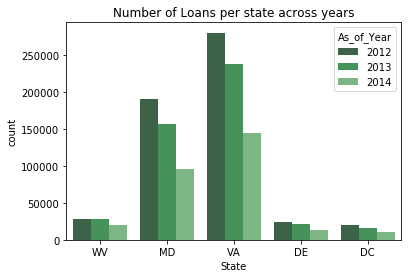

In [48]:
sns.countplot(x="State", hue="As_of_Year", data=ExpandedData, palette="Greens_d").set_title('Number of Loans per state across years')
plt.show()

### Total Loan Amounts per Year by State

In [169]:
ExpandedData.groupby(['State','As_of_Year'])['Loan_Amount_000'].sum()

State  As_of_Year
DC     2012           7464183
       2013           6379529
       2014           4502968
DE     2012           5002625
       2013           4361264
       2014           2866401
MD     2012          51479628
       2013          41501868
       2014          26864917
VA     2012          74647218
       2013          61949241
       2014          39549022
WV     2012           3873901
       2013           3827546
       2014           2720597
Name: Loan_Amount_000, dtype: int64

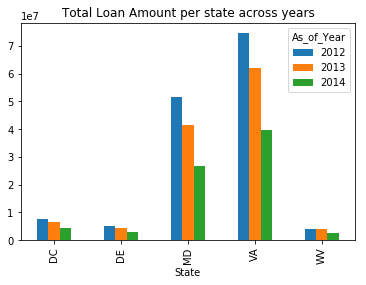

In [49]:
ExpandedData.groupby(['State','As_of_Year'])['Loan_Amount_000'].sum().reset_index().pivot('State','As_of_Year','Loan_Amount_000').plot(kind='bar')
plt.title('Total Loan Amount per state across years')
plt.show()

**Both total number of Loans and total amount of loans are decreasing in all the states. Let's break it up by Purpose of Loan to see what is happening**

### Number of Loans per Year per State by Purpose Description

In [171]:
ExpandedData.groupby(['State','Loan_Purpose_Description','As_of_Year'])['Loan_Amount_000'].count()

State  Loan_Purpose_Description  As_of_Year
DC     Purchase                  2012            5599
                                 2013            6234
                                 2014            6501
       Refinance                 2012           13984
                                 2013           10296
                                 2014            4267
DE     Purchase                  2012            6992
                                 2013            7687
                                 2014            8105
       Refinance                 2012           17585
                                 2013           14183
                                 2014            5538
MD     Purchase                  2012           46135
                                 2013           51861
                                 2014           53613
       Refinance                 2012          143584
                                 2013          104318
                                 2014 

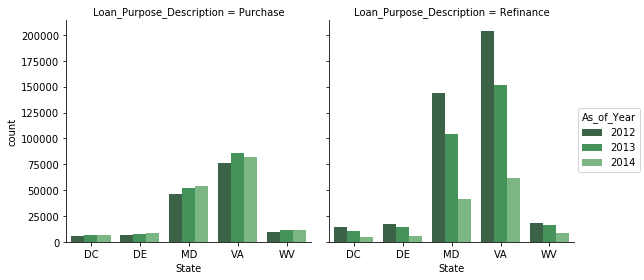

In [172]:
sns.factorplot(col="Loan_Purpose_Description", hue="As_of_Year",
               x="State", data=ExpandedData.sort_values(by='State'), kind="count", palette="Greens_d");
plt.show()

### Loan Amount per Year per State by Purpose Description


In [173]:
ExpandedData.groupby(['State','Loan_Purpose_Description','As_of_Year'])['Loan_Amount_000'].sum()

State  Loan_Purpose_Description  As_of_Year
DC     Purchase                  2012           2255402
                                 2013           2658859
                                 2014           2856127
       Refinance                 2012           5208781
                                 2013           3720670
                                 2014           1646841
DE     Purchase                  2012           1435130
                                 2013           1648233
                                 2014           1783575
       Refinance                 2012           3567495
                                 2013           2713031
                                 2014           1082826
MD     Purchase                  2012          13078382
                                 2013          15394350
                                 2014          16029090
       Refinance                 2012          38401246
                                 2013          26107518
    

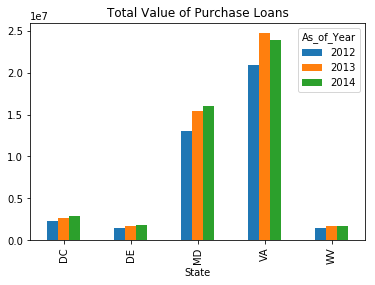

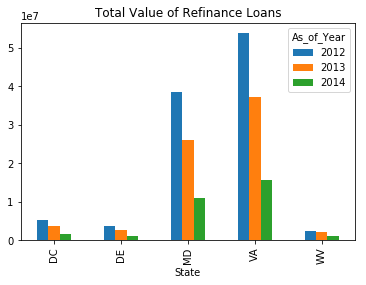

In [174]:
TempDF = ExpandedData.groupby(['State','Loan_Purpose_Description','As_of_Year'])['Loan_Amount_000'].sum().reset_index()
TempDF = TempDF[TempDF['Loan_Purpose_Description']=='Purchase']
TempDF = TempDF.pivot('State','As_of_Year','Loan_Amount_000').plot(kind='bar')
plt.title('Total Value of Purchase Loans')
plt.show()


TempDF = ExpandedData.groupby(['State','Loan_Purpose_Description','As_of_Year'])['Loan_Amount_000'].sum().reset_index()
TempDF = TempDF[TempDF['Loan_Purpose_Description']=='Refinance']
TempDF = TempDF.pivot('State','As_of_Year','Loan_Amount_000').plot(kind='bar')
plt.title('Total Value of Refinance Loans')
plt.show()

**Refinance Loans are decreasing both in Total Value and Total Amount in all the states while Purchase Loans are growing in Value and Amount. Company may need to focus on Purchase loans**

#                                         # Choosing a market

In [175]:
ExpandedData.groupby(['State','Loan_Purpose_Description','As_of_Year']).median()

Applicant_Income_000  \
State Loan_Purpose_Description As_of_Year                         
DC    Purchase                 2012                       121.0   
                               2013                       126.0   
                               2014                       130.0   
      Refinance                2012                       130.0   
                               2013                       122.0   
                               2014                       119.0   
DE    Purchase                 2012                        63.0   
                               2013                        67.0   
                               2014                        69.0   
      Refinance                2012                        81.9   
                               2013                        79.3   
                               2014                        78.8   
MD    Purchase                 2012                        85.6   
                               2013                        89.0   
                               2014                        90.0   
      Refinance                2012                       105.7   
                               2013                       100.0   
                               2014                        98.0   
VA    Purchase                 2012                        82.0   
                               2013                        85.0   
                               2014                        87.0   
      Refinance                2012                       103.0   
                               2013                        94.0   
                               2014                        90.0   
WV    Purchase                 2012                        59.0   
                               2013                        62.0   
                               2014                        62.0   
      Refinance                2012                        70.0   
                               2013                        67.0   
                               2014                        64.0   

                                           FFIEC_Median_Family_Income  \
State Loan_Purpose_Description As_of_Year                               
DC    Purchase                 2012                          105700.0   
                               2013                          105900.0   
                               2014                          107100.0   
      Refinance                2012                          105700.0   
                               2013                          105900.0   
                               2014                          107100.0   
DE    Purchase                 2012                           81900.0   
                               2013                           79300.0   
                               2014                           78800.0   
      Refinance                2012                           81900.0   
                               2013                           79300.0   
                               2014                           78800.0   
MD    Purchase                 2012                           85600.0   
                               2013                           85600.0   
                               2014                           83500.0   
      Refinance                2012                           85600.0   
                               2013                           85600.0   
                               2014                           83500.0   
VA    Purchase                 2012                           75600.0   
                               2013                           73900.0   
                               2014                           76400.0   
      Refinance                2012                          105700.0   
                               2013                           73900.0   
                               2014                           76400.0   


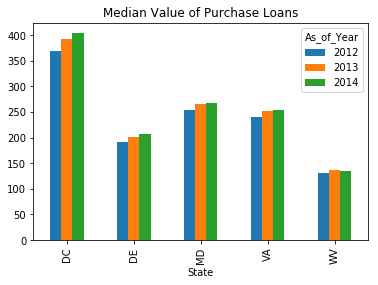

In [176]:
TempDF = ExpandedData.groupby(['State','Loan_Purpose_Description','As_of_Year'])['Loan_Amount_000'].median().reset_index()
TempDF = TempDF[TempDF['Loan_Purpose_Description']=='Purchase']
TempDF = TempDF.pivot('State','As_of_Year','Loan_Amount_000').plot(kind='bar')
plt.title('Median Value of Purchase Loans')
plt.show()

**My recommendation would be to Focus on MD and VA because they have the highest number of Loans and highest loan amounts. 
However DC area is something that shouldn't be overlooked because the median value of Purchase Loans is the highest in that State**

## One Step Further

Let us go deeper into geographies and cluster different counties based on lending patterns

In [177]:
ExpandedData.columns

Index(['Agency_Code', 'Applicant_Income_000', 'As_of_Year',
       'Census_Tract_Number', 'County_Code', 'FFIEC_Median_Family_Income',
       'Loan_Amount_000', 'MSA_MD', 'Number_of_Owner_Occupied_Units',
       'Respondent_ID', 'Sequence_Number', 'State_Code',
       'Tract_to_MSA_MD_Income_Pct', 'MSA_MD_Description',
       'Loan_Purpose_Description', 'Agency_Code_Description',
       'Lien_Status_Description', 'Loan_Type_Description', 'State',
       'County_Name', 'Conforming_Limit_000', 'Conventional_Status',
       'Conforming_Status', 'Conventional_Conforming_Flag',
       'Respondent_Name_TS', 'Loan_Size'],
      dtype='object')

In [178]:
ClusterData = ExpandedData[['Applicant_Income_000', 'Loan_Amount_000', 
       'Loan_Purpose_Description', 'Lien_Status_Description', 'State',
       'County_Name', 'Conforming_Limit_000', 'Conventional_Status',
       'Conforming_Status', 'Respondent_Name_TS','Conventional_Conforming_Flag']]

In [179]:
ClusterData.isnull().sum()/len(ClusterData)

Applicant_Income_000            0.000083
Loan_Amount_000                 0.000000
Loan_Purpose_Description        0.000000
Lien_Status_Description         0.000000
State                           0.000000
County_Name                     0.000649
Conforming_Limit_000            0.000649
Conventional_Status             0.000000
Conforming_Status               0.000000
Respondent_Name_TS              0.000000
Conventional_Conforming_Flag    0.000000
dtype: float64

In [180]:
#As Percentage of Nulls is low we can safely drop them 
ClusterData = ClusterData.dropna()

In [181]:
#Create Dummies for Categorical Variables
ClusterData = pd.get_dummies(ClusterData, columns = ['Loan_Purpose_Description','Lien_Status_Description','Conventional_Status','Conforming_Status','Conventional_Conforming_Flag'])

In [182]:
ClusterData['No_Loans'] = 1

In [183]:
ClusterData.columns

Index(['Applicant_Income_000', 'Loan_Amount_000', 'State', 'County_Name',
       'Conforming_Limit_000', 'Respondent_Name_TS',
       'Loan_Purpose_Description_Purchase',
       'Loan_Purpose_Description_Refinance',
       'Lien_Status_Description_First Lien',
       'Lien_Status_Description_Subordinate Lien',
       'Conventional_Status_Conventional',
       'Conventional_Status_Non-Conventional', 'Conforming_Status_Conforming',
       'Conforming_Status_Jumbo', 'Conventional_Conforming_Flag_N',
       'Conventional_Conforming_Flag_Y', 'No_Loans'],
      dtype='object')

 ### Cluster by County

In [184]:
CountyData = ClusterData.groupby(['County_Name']).agg({'Applicant_Income_000': 'median', 
                                          'Loan_Amount_000': 'median', 
                                          'No_Loans':'sum',
                                          'Loan_Purpose_Description_Purchase':'sum' ,
                                          'Lien_Status_Description_First Lien': 'sum', 
                                          'Conforming_Limit_000': 'median', 
                                          'Conventional_Status_Conventional' : 'sum',
                                          'Conforming_Status_Conforming': 'sum', 
                                          'Conventional_Conforming_Flag_Y' : 'sum'})

In [185]:
#Convert Categorical Columns to Percentage
for column in ['Loan_Purpose_Description_Purchase','Lien_Status_Description_First Lien','Conventional_Status_Conventional',
              'Conforming_Status_Conforming','Conventional_Conforming_Flag_Y']:
    CountyData[column] = CountyData[column]/ CountyData['No_Loans']

#Drop No of Obs CountyData = CountyData.drop('No_Obs', axis = 1)

In [186]:
CountyData.head()

,Conforming_Limit_000,Conventional_Status_Conventional,Conforming_Status_Conforming,Applicant_Income_000,Loan_Amount_000,Conventional_Conforming_Flag_Y,Lien_Status_Description_First Lien,Loan_Purpose_Description_Purchase,No_Loans
County_Name,,,,,,,,,
ACCOMACK,417.0,0.750727,0.988361,65.0,141.0,0.740058,0.981571,0.317168,1031
ALBEMARLE,437.0,0.834753,0.936698,93.0,241.0,0.779204,0.987162,0.393416,7867
ALEXANDRIA,625.0,0.810613,0.895501,133.0,368.0,0.735428,0.983036,0.407071,14737
ALLEGANY,417.0,0.738364,0.999335,56.0,94.5,0.737699,0.961436,0.339096,3008
ALLEGHANY,417.0,0.641248,1.000000,57.0,107.0,0.641248,0.991334,0.421144,577


In [191]:
#Normalize data to mean 0 and variance 1 for clustering
scaler = StandardScaler()
scaler.fit(CountyData)
CountyDataScaled = scaler.transform(CountyData)

In [199]:
#Loop to find the optimal number of clusters
Inertia = [None,None] #None because we are not calculating inertia for cluster = 0 or cluster = 1
for clusternumber in range(2,100,1):
    model = KMeans(n_clusters= clusternumber)
    model.fit(CountyDataScaled)
    Inertia.append(model.inertia_)

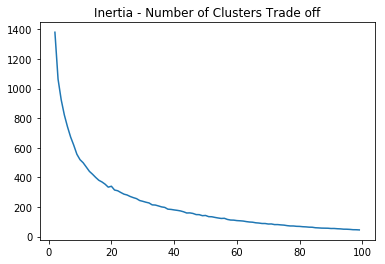

In [200]:
#Elbow method to choose the optimal number of clusters
plt.title('Inertia - Number of Clusters Trade off')
plt.plot(Inertia)
plt.show()

Looks like 10 cluster is the optimal number of clusters

In [201]:
#Run K means for number of clusters = 10
model = KMeans(n_clusters= 10)
model.fit(CountyDataScaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [202]:
#Get Cluster Results
CountyData['Cluster'] = model.labels_

In [203]:
#Get Centroids to understand Clusters
CountyClusterResults = CountyData.groupby('Cluster').mean()

#Add Number of Counties per Cluster
CountyClusterResults['No_Counties'] = CountyData.groupby('Cluster')['Loan_Amount_000'].count()

In [204]:
#Sort Clusters by Percentage of Purchase Loans
CountyClusterResults.sort_values(by = 'Loan_Purpose_Description_Purchase', ascending=False)

,Conforming_Limit_000,Conventional_Status_Conventional,Conforming_Status_Conforming,Applicant_Income_000,Loan_Amount_000,Conventional_Conforming_Flag_Y,Lien_Status_Description_First Lien,Loan_Purpose_Description_Purchase,No_Loans,No_Counties
Cluster,,,,,,,,,,
2,417.571429,0.769063,0.996127,61.740000,105.528571,0.765765,0.988662,0.447908,1317.371429,35
6,496.500000,0.482837,0.993926,68.868750,164.500000,0.479287,0.972782,0.382472,7618.687500,16
4,625.000000,0.602312,0.993207,96.227273,239.454545,0.598713,0.987208,0.376261,6971.818182,11
9,425.128205,0.635210,0.996190,60.061538,136.000000,0.632476,0.989582,0.374794,1843.076923,39
8,581.333333,0.667672,0.971393,100.050000,262.333333,0.649536,0.989359,0.370375,48681.666667,6
7,417.000000,0.741680,0.995652,59.469697,118.727273,0.737876,0.971701,0.369900,1869.212121,33
5,603.166667,0.859864,0.882714,134.166667,365.166667,0.763602,0.986167,0.359419,19879.500000,6
1,477.592593,0.704575,0.974658,81.522222,209.703704,0.684947,0.982846,0.352702,9268.777778,27
0,625.000000,0.839630,0.924061,124.000000,332.500000,0.777289,0.987016,0.304046,109691.500000,2


**Change Financial should be focusing on Clusters 8, 4 and 9** 

**Counties in Cluster 8 have a low average number of loans but contains the highest percentage of Purchase Loans. Also, the number of counties in this cluster is high making it potentially a good market**

**Cluster 4 has the second highest percentage of Purchase loans (Growing Segment). Also the counties in this cluster have a high average number of loans, so the market size is big eventhough the number of counties in this cluster is low**

**Cluster 9 is another good market because it too contains a high average number of loans and the percentage of Purchase loans is not too different from cluster 4**

In [205]:
#Counties in CLuster 8
CountyData[CountyData['Cluster']==8].index

Index(['ANNE ARUNDEL', 'BALTIMORE', 'FREDERICK', 'LOUDOUN', 'PRINCE GEORGE'S',
       'PRINCE WILLIAM'],
      dtype='object', name='County_Name')

In [206]:
#Counties in CLuster 4
CountyData[CountyData['Cluster']==4].index

Index(['CALVERT', 'CHARLES', 'CLARKE', 'FAUQUIER', 'FREDERICKSBURG',
       'JEFFERSON', 'MANASSAS', 'MANASSAS PARK', 'SPOTSYLVANIA', 'STAFFORD',
       'WARREN'],
      dtype='object', name='County_Name')

In [207]:
#Counties in CLuster 9
CountyData[CountyData['Cluster']==9].index

Index(['ALLEGHANY', 'AMELIA', 'AMHERST', 'APPOMATTOX', 'BARBOUR',
       'BEDFORD IND', 'BERKELEY', 'BUCKINGHAM', 'CAMPBELL', 'COVINGTON',
       'CULPEPER', 'DANVILLE', 'DORCHESTER', 'EMPORIA', 'ESSEX', 'FLUVANNA',
       'FRANKLIN IND', 'GALAX', 'GREENE', 'HENRY', 'KENT', 'KING AND QUEEN',
       'MARTINSVILLE', 'MONROE', 'NOTTOWAY', 'ORANGE', 'PITTSYLVANIA',
       'PRINCE EDWARD', 'PULASKI', 'RADFORD', 'RANDOLPH', 'SHENANDOAH',
       'SOMERSET', 'SOUTHAMPTON', 'SURRY', 'TAZEWELL', 'WASHINGTON',
       'WESTMORELAND', 'WICOMICO'],
      dtype='object', name='County_Name')

# Some Interactivity

In [219]:
'''The following function displays the major players in the home loans market in a chosen state 
The function takes in the state name(For ex: 'MD'), Top_n as the number of top banks, and the dataset(ExpandedData) as parameters'''

def TopNBanks(State, N, ExpandedData):
    df1 = ExpandedData[ExpandedData.As_of_Year == '2014']
    df2 =df1[df1['State']==State] 
    df3 = df2[['Loan_Amount_000', 'Respondent_Name_TS']].groupby('Respondent_Name_TS').sum()
    df4 = df3['Loan_Amount_000']
    data = {'Respondent_Name_TS':df4.index.values, 'Loan_Amount_000':df4.values} 
    df5 = pd.DataFrame(data).nlargest(N, 'Loan_Amount_000')
    labels = df5['Respondent_Name_TS']
    Data = df5['Loan_Amount_000']
    fig1, ax1 = plt.subplots()
    ax1.pie(Data, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


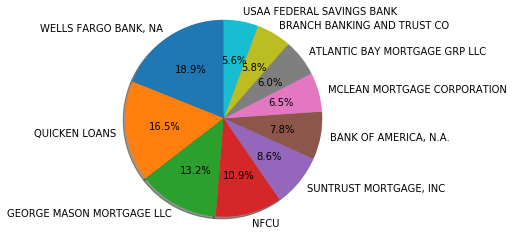

In [211]:
#Example: Let us see who the top 10 players are in Virginia, in terms of total Loan Amount
TopNBanks('VA', 10, ExpandedData)

In [73]:
'''The following function displays market share for a competitor in a chosen geography(state). 
The function takes in the company name as a string, State(s) as a **list** (For ex: ['VA', 'DC'], and the dataset as parameters'''

def MarketShare (CompanyName, Geography, ExpandedData):
    ExpandedData2014_df = ExpandedData[ExpandedData.As_of_Year == '2014']
    TempDF1 =ExpandedData2014_df[ExpandedData2014_df.State.isin(Geography)]
    TempDF2 = TempDF1[TempDF1['Respondent_Name_TS'] == CompanyName]
    TotalGeographySales = TempDF1['Loan_Amount_000'].sum()
    TotalCompanySales = TempDF2['Loan_Amount_000'].sum()
    CompanyMarketShare = TotalCompanySales  / TotalGeographySales 
    OthersMarketShare = 1 - CompanyMarketShare
    
    labels = [CompanyName, 'Rest of the Competitors']
    Data = [CompanyMarketShare , OthersMarketShare]
    explode = (0.1, 0)
    fig1, ax1 = plt.subplots()
    ax1.pie(Data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

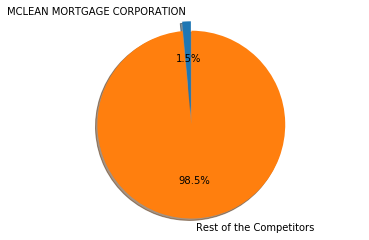

In [78]:
#Example: Let us see what the combined market share of MCLEAN MORTGAGE CORPORATION is in the states fo VA, DE, MD 
MarketShare('MCLEAN MORTGAGE CORPORATION', ['VA', 'DE','MD'], ExpandedData)

# SUMMARY

**1.**	When we break down the loans in terms of purpose, we see that refinancing loans makes up the largest share of the two in terms of amount. Also, existing lenders seem to sanction refinancing loans more than new home purchase loans. 

**2.**	However, refinance Loans are decreasing both in Total Value across the years and Total number in all the states while Purchase Loans are growing in Value and Amount of loans.  

**3.**	My recommendation would be to focus on MD and VA because they have the highest number of Loans and highest loan amounts. However, the DC area is something that shouldn't be overlooked because the median value of Purchase Loans is the highest there

**4.**	However, although there is a decreasing trend in refinance loans, banks still prefer refinance loans more. Hence it would be unwise not to target refinance loans especially in the big geographies such as VA, MD	

**5.**	Due to large number of loan applications and relatively high applicant income - its ideal for Change Financial to consider both Maryland or Virginia states. 

**6.**	Also, looking at the clusters of similar counties, as explained in the code, I would recommend Change Financial target especially these clusters of counties (**8, 4 and 9**) with intensive marketing and outreach activities.  
       
*Cluster 8 has a low average number of loans but contains the highest percentage of Purchase Loans. Also, the number of counties in this cluster is high making it potentially a good market. Cluster 4 has the second highest percentage of Purchase loans (Growing Segment). Also the counties in this cluster have a high average number of loans, so the market size is big even though the number of counties in this cluster is low. Cluster 9 is another good market because it too contains a high average number of loans and the percentage of Purchase loans is not too different from cluster 4*

**7.**	More needs to be done to explore if the general decline in volume and amount of loans in these 5 states is also seen in the rest of the country and the reasons examined therein.

